<a href="https://colab.research.google.com/github/vifirsanova/hse-python-course/blob/main/workbook/5_nlp_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка
В этом воркбуке мы познакомимся с библиотеками для обработки естественного языка и отработаем цикл FOR.

**HuggingFace Datasets**

HuggingFace - платформа для работы с моделями с архитектурой Transformer для обработки текстов и не только!

Datasets дает доступ к коллекциям данных и позволяет создавать свои наборы для машинного обучения.

`pip install` - команда shell для загрузки библиотеки

`-q` - параметр "quiet", не выводит не экран подробную информацию о процессе загрузки библиотеки

`!` - символ для объявления shell-команд

In [1]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00


Загрузим датасет для анализа тональности текстов

In [2]:
from datasets import load_dataset

dataset = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/31232 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5205 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5206 [00:00<?, ? examples/s]

Проведем анализ!

Структура объекта dataset довольно сложная, но удобная для интерпретации.

У нас есть 3 выборки: train, validation и test.

В каждой выборке 4 столбца:

- ID элемента датасета, он нужен, чтобы все значения были уникальными, как в реляционной БД
- text, label, sentiment

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 31232
    })
    validation: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5205
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5206
    })
})

Обычно для обработки таких данных используется библиотека pandas, но пока мы учимся, будем использовать нативный метод - цикл FOR.

#**Задание 1**

Для начала проверим, сбалансирован ли наш датасет.

In [7]:
# Какие метки есть в датасете?

# Создаем множество set()
# Множество - это список уникальных элементов
# Этот тип данных можно использовать как фильтр для наших меток
unique_labels = set()

# Для каждого уникального элемента из обучающей выборки dataset['train']
# Добавим элемент в множество unique_labels
for i in dataset['train']:
  unique_labels.add(i['sentiment'])

unique_labels

{'negative', 'neutral', 'positive'}

In [12]:
# Теперь посчитаем, сколько представителей каждой метки в выборках train, validation и test
# Подсказки:
# - создайте пустые переменные, куда вы будете вносить количество меток
# - используйте цикл for и условия if
# - обновляйте значения переменных методом счетчика (каждое новое совпадение: counter += 1)
# - выведите на экран значения переменных для каждой из трех выборок

### ваш код здесь ###

Данные обучающей выборки
---
Положительные метки: 10478 единиц
Отрицательне метки: 9105 единиц
Нейтральные метки: 11649 единиц

Данные проверочной выборки 
?

Данные тестовой выборки 
?


In [20]:
# Используйте арифметические операции, чтобы посчитать процентное соотношение или долю каждого класса в каждой выборке

### ваш код здесь ###

Положительные метки составляют 34 % обучающей выборки
Отрицательные метки составляют 29 % обучающей выборки
Нейтральные метки составляют 37 % обучающей выборки

Данные проверочной выборки ?
Данные тестовой выборки ?


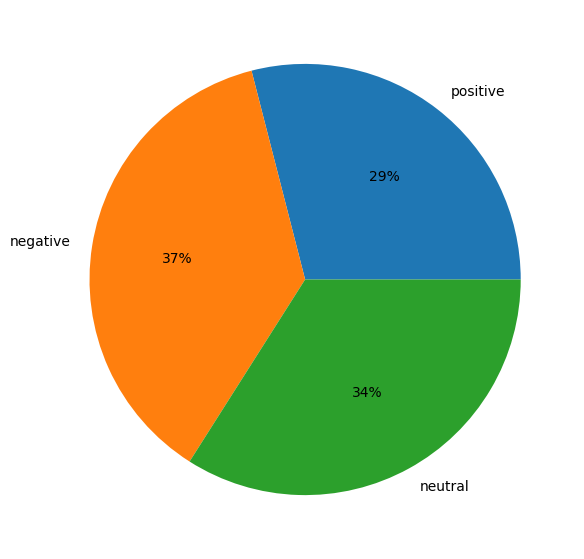

In [26]:
# Создадим визуализацию
# Будем работать с библиотекой matplotlip
# Numpy - библиотека для обработки массивов данных - обеспечивает работу matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Задаем список меток
labels = ### ваш код здесь ###
# Задаем значения для каждой метки, процентное соотношение (только для обучающей выборки)
data = ### ваш код здесь ###

# Код для отрисовки круговой диаграммы
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%') # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.show()

In [ ]:
# Сделаем то же самое для проверочной выборки
### ваш код здесь ###

In [ ]:
# Сделаем то же самое для тестовой выборки
### ваш код здесь ###

#**Задание 2**

Займемся обработкой естественного языка.

Познакомимся с библиотекой SpaCy для обработки текстов.

In [28]:
# Загрузка spaCy
import spacy

# Загрузка библиотеки для визуализации spaCy
from spacy import displacy

# Инициализация инструментов SpaCy для английского (для каждого языка загружается свой вариант)
nlp = spacy.load('en_core_web_sm')

# Выведем доступные инструменты
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


Токенизация SpaCy производится с помощью цикла for

In [31]:
# Образец текста из нашего датасета
sample = dataset['train'][0]['text']
sample

'Cooking microwave pizzas, yummy'

In [32]:
# Для работы со SpaCy, _нужно_ привести все к нужному виду
# Для этого загружаем в nlp наш текст
doc = nlp(sample)
doc # Визуально ничего не изменилось, но теперь это объект класса SpaCy, который можно обработать инструментами NLP

Cooking microwave pizzas, yummy

In [34]:
# Токенизация
for token in doc:
    print(token.text)

Cooking
microwave
pizzas
,
yummy


In [35]:
# Частересная разметка
for token in doc:
    print(token.pos_)

NOUN
NOUN
NOUN
PUNCT
ADJ


In [37]:
# Лемматизация
for token in doc:
    print(token.lemma_)

cooking
microwave
pizza
,
yummy


In [39]:
# Синтаксическая роль (составляющие)
for token in doc:
    print(token.tag_)

NN
NN
NNS
,
JJ


In [41]:
# Синтаксическая роль (зависимости)
for token in doc:

    print(token.dep_)

compound
compound
ROOT
punct
amod


In [42]:
# Морфологическая разметка
for token in doc:
    print(token.morph)

Number=Sing
Number=Sing
Number=Plur
PunctType=Comm
Degree=Pos


Задание!

1. Сохраним в отдельную переменную список текстов из тестовой выборки

In [47]:
### ваш код здесь ###
# Выведите первые 5 текстов

['getting cds ready for tour',
 ' MC, happy mother`s day to your mom ;).. love yah',
 'A year from now is graduation....i am pretty sure i`m not ready for it!?!?!?',
 ' because you had chips and sale w/o me',
 'Great for organising my work life balance']

2. Создадим список токенов для каждого текста с помощью SpaCy

In [57]:
### ваш код здесь ###
# Не забудьте применить nlp!
# Выведите первые 5 текстов
# Обработка может занять много времени, достаточно обработать первые 100 текстов

[['getting', 'cds', 'ready', 'for', 'tour'],
 [' ',
  'MC',
  ',',
  'happy',
  'mother`s',
  'day',
  'to',
  'your',
  'mom',
  ';)',
  '..',
  'love',
  'yah'],
 ['A',
  'year',
  'from',
  'now',
  'is',
  'graduation',
  '....',
  'i',
  'am',
  'pretty',
  'sure',
  'i`m',
  'not',
  'ready',
  'for',
  'it',
  '!',
  '?',
  '!',
  '?',
  '!',
  '?'],
 [' ', 'because', 'you', 'had', 'chips', 'and', 'sale', 'w/o', 'me'],
 ['Great', 'for', 'organising', 'my', 'work', 'life', 'balance']]

3. Частеречная разметка: создаем список частей речи для каждого токена

In [58]:
### ваш код здесь ###

[['VERB', 'NOUN', 'ADJ', 'ADP', 'NOUN'],
 ['SPACE',
  'PROPN',
  'PUNCT',
  'ADJ',
  'PROPN',
  'NOUN',
  'ADP',
  'PRON',
  'NOUN',
  'PUNCT',
  'PUNCT',
  'NOUN',
  'NOUN'],
 ['DET',
  'NOUN',
  'ADP',
  'ADV',
  'AUX',
  'NOUN',
  'PUNCT',
  'PRON',
  'AUX',
  'ADV',
  'ADJ',
  'PROPN',
  'PART',
  'ADJ',
  'ADP',
  'PRON',
  'PUNCT',
  'PUNCT',
  'PUNCT',
  'PUNCT',
  'PUNCT',
  'PUNCT'],
 ['SPACE', 'SCONJ', 'PRON', 'VERB', 'NOUN', 'CCONJ', 'NOUN', 'ADP', 'PRON'],
 ['ADJ', 'ADP', 'VERB', 'PRON', 'NOUN', 'NOUN', 'NOUN']]

4. Проверим точность разметки. С помощью range выведем для первых пяти текстов пары "слово - его частеречный тег".

In [63]:
# Это задание сложнее, чем кажется
# Подсказка:
# for i in range(len(list)) - это итерация по _длине_ списка;
# в переменную i сохраняется порядковый номер текущего элемента списка;
# если у нас есть несколько сопоставимых списков одинаковой длины,
# то на каждом шаге итерации мы можем выводить элементы одного порядка из разных списков,
# например for i in range(len(list)) поможет вывести tokens[4] и pos[4] одновременно, в одном блоке кода

Текст 0
getting VERB
cds NOUN
ready ADJ
for ADP
tour NOUN

Текст 1
  SPACE
MC PROPN
, PUNCT
happy ADJ
mother`s PROPN
day NOUN
to ADP
your PRON
mom NOUN
;) PUNCT
.. PUNCT
love NOUN
yah NOUN

Текст 2
A DET
year NOUN
from ADP
now ADV
is AUX
graduation NOUN
.... PUNCT
i PRON
am AUX
pretty ADV
sure ADJ
i`m PROPN
not PART
ready ADJ
for ADP
it PRON
! PUNCT
? PUNCT
! PUNCT
? PUNCT
! PUNCT
? PUNCT

Текст 3
  SPACE
because SCONJ
you PRON
had VERB
chips NOUN
and CCONJ
sale NOUN
w/o ADP
me PRON

Текст 4
Great ADJ
for ADP
organising VERB
my PRON
work NOUN
life NOUN
balance NOUN



5. Разметка именованных сущностей

Вернемся к списку токенов, который мы создали в пункте 2. Выберем небольшой срез, например тексты 7-19.

In [73]:
# Для каждого текста из выбранного среза: допишите этот код
  # Применим к тексту nlp: допишите этот код
  print([(ent, ent.label_) for ent in text.ents]) # Выведем именованную сущность и ее лейбл

[(1st, 'ORDINAL'), (2890, 'CARDINAL')]
[(first, 'ORDINAL')]
[(today, 'DATE'), (i`m, 'NORP')]
[]
[(Audi, 'ORG')]
[]
[(REALLY, 'GPE')]
[(i`m, 'NORP')]
[]
[]
[(TY, 'ORG')]
[(recent years, 'DATE')]


Здесь мы используем новый тип данных - кортеж `(entity, label)`

Кортеж очень похож на список. Разница только в том, что кортеж - неизменяемый, т.е. это список, в котором ничего нельзя изменить, удалить или добавить.

Кортежи занимают меньше памяти, т.к. у них меньше свойств. Они защищают данные от изменений и могут применяться в сложных структурах, например, служить ключом для словаря `dict`.

На практике, их удобно применять для разметки данных  методами NLP.

In [80]:
# Выберите любой текст и визуализируйте его разметку именованных сущностей
displacy.render(nlp(### здесь укажите любой нетокенизированный текст из датасета с помощью индексации ###), style="ent", jupyter=True)